## Lab | Random Forests

In [9]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

#### Apply the Random Forests algorithm but this time only by upscaling the data.

1. Load the datasets to pd.DataFrame.
2. Try to predict whether a customer will donate or not ('TARGET_B').

In [3]:
df = pd.read_csv(r'files_for_lab/target.csv')
display(df.shape, df.head())

(95412, 2)

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [6]:
numerical = pd.read_csv(r'files_for_lab/numerical.csv')
display(numerical.shape,'Null values:',numerical.isna().sum(), numerical.head())

(95412, 315)

'Null values:'

TCODE       0
AGE         0
INCOME      0
WEALTH1     0
HIT         0
           ..
AVGGIFT     0
CONTROLN    0
HPHONE_D    0
RFA_2F      0
CLUSTER2    0
Length: 315, dtype: int64

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18,20,5,7,6,0,11,33,4,3,2,12,3,3

In [12]:
categorical = pd.read_csv(r'files_for_lab/categorical.csv')
display(categorical.shape,categorical.isna().sum(), categorical.head())

(95412, 22)

STATE           0
CLUSTER         0
HOMEOWNR        0
GENDER          0
DATASRCE        0
RFA_2R          0
RFA_2A          0
GEOCODE2        0
DOMAIN_A        0
DOMAIN_B        0
ODATEW_YR       0
ODATEW_MM       0
DOB_YR          0
DOB_MM          0
MINRDATE_YR     0
MINRDATE_MM     0
MAXRDATE_YR     0
MAXRDATE_MM     0
LASTDATE_YR     0
LASTDATE_MM     0
FIRSTDATE_YR    0
FIRSTDATE_MM    0
dtype: int64

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,90,1,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,87,1,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,86,1,20,1,93,10,96,1,96,1,79,3


## Reduce number of features

## Random Forest: Will donate or not?
over column 'Target B':

* 0 - Won't donate
* 1 - Will donate

In [14]:
data = pd.concat([numerical, categorical, df], axis=1)
data.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3

X y splt

In [15]:
y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis = 1)

numericalX = X.select_dtypes(include=np.number)  # Select numerical columns
categoricalX = X.select_dtypes(include=object)   # Select categorical columns

In [16]:
numericalX.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,36,3,2,89,1,37,12,92,8,94,2,95,12,89,11,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,14,3,1,94,1,52,2,93,10,95,12,95,12,93,10,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,

In [17]:
categoricalX.head()

,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
0,IL,H,F,L,E,C,T
1,CA,H,M,L,G,A,S
2,NC,U,M,L,E,C,R
3,CA,U,F,L,E,C,R
4,FL,H,F,L,F,A,S


Using OneHotEncoder to encode the categorical variables.

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numericalX.columns),  # Numerical features (no transformation)
        ('cat', OneHotEncoder(drop='first'), categoricalX.columns)  # One-hot encode categorical features
    ])

# Fit and transform the data
X = preprocessor.fit_transform(pd.concat([numericalX, categoricalX], axis=1))
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354
0,0.0,60.000000,5.0,9.0,0.0,0.0,39.0,34.0,18.0,10.0,2.0,1.0,5.0,992.0,264.0,332.0,0.0,35.0,65.0,47.0,53.0,92.0,1.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,39.0,48.0,51.0,40.0,50.0,54.0,25.0,31.0,42.0,27.0,11.0,14.0,18.0,17.0,13.0,11.0,15.0,12.0,11.0,34.0,25.0,18.0,26.0,10.0,23.0,18.0,33.0,49.0,28.0,12.0,4.0,61.0,7.0,12.0,19.0,198.0,276.0,97.0,95.0,2.0,2.0,0.0,0.0,7.0,7.0,0.0,479.0,635.0,3.0,2.0,86.0,14.0,96.0,4.0,7.0,38.0,80.0,70.0,32.0,84.0,16.0,6.0,2.0,5.0,9.0,15.0,3.0,17.0,50.0,25.0,0.0,0.0,0.0,2.0,7.0,13.0,27.0,47.0,0.0,1.0,61.0,58.0,61.0,15.0,4.0,2.0,0.0,0.0,14.0,1.0,0.0,0.0,2.0,5.0,17.0,73.0,0.0,177.0,682.0,307.0,318.0,349.0,378.0,12883.0,13.0,23.0,23.0,23.0,15.0,1.0,0.0,0.0,1.0,4.0,25.0,24.0,26.0,17.0,2.0,0.0,0.0,2.0,28.0,4.0,51.0,1.0,46.0,54.0,3.0,88.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,13.0,14.0,16.0,2.0,45.0,56.0,64.0,50.0,64.0,44.0,62.0,53.0,99.0,0.0,0.0,9.0,3.0,8.0,13.0,9.0,0.0,3.0,9.0,3.0,15.0,19.0,5.0,4.0,3.0,0.0,3.0,41.0,1.0,0.0,7.0,13.0,6.0,5.0,0.0,4.0,9.0,4.0,1.0,3.0,10.0,2.0,1.0,7.0,78.0,2.0,0.0,120.0,16.0,10.0,39.0,21.0,8.0,4.0,3.0,5.0,20.0,3.0,19.0,4.0,0.0,0.0,0.0,18.0,39.0,0.0,34.0,23.0,18.0,16.0,1.0,4.0,0.0,23.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,74.0,88.0,8.0,0.0,4.0,96.0,77.0,19.0,13.0,31.0,5.0,14.0,14.0,31.0,54.0,46.0,0.0,0.0,90.0,0.0,10.0,0.0,0.0,0.0,33.0,65.0,40.0,99.0,99.0,6.0,2.0,10.0,7.0,27.0,74.0,6.0,14.0,240.0,31.0,14.0,5.0,12.0,10.0,4.0,7.741935,95515.0,0.0,4.0,39.0,36.0,3.0,2.0,89.0,1.0,37.0,12.0,92.0,8.0,94.0,2.0,95.0,12.0,89.0,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,46.000000,6.0,9.0,16.0,0.0,15.0,55.0,11.0,6.0,2.0,1.0,9.0,3611.0,940.0,998.0,99.0,0.0,0.0,50.0,50.0,67.0,0.0,0.0,31.0,6.0,4.0,2.0,6.0,4.0,14.0,0.0,0.0,2.0,0.0,1.0,4.0,34.0,41.0,43.0,32.0,42.0,45.0,32.0,33.0,46.0,21.0,13.0,14.0,33.0,23.0,10.0,4.0,2.0,11.0,16.0,36.0,22.0,15.0,12.0,1.0,5.0,4.0,21.0,75.0,55.0,23.0,9.0,69.0,4.0,3.0,24.0,317.0,360.0,99.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5468.0,5218.0,12.0,10.0,96.0,4.0,97.0,3.0,9.0,59.0,94.0,88.0,55.0,95.0,5.0,4.0,1.0,3.0,5.0,4.0,2.0,18.0,44.0,5.0,0.0,0.0,0.0,97.0,98.0,98.0,98.0,99.0,94.0,0.0,83.0,76.0,73.0,21.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,91.0,91.0,91.0,94.0,4480.0,13.0,803.0,1088.0,1096.0,1026.0,1037.0,36175.0,2.0,6.0,2.0,5.0,15.0,14.0,13.0,10.0,33.0,2.0,5.0,2.0,5.0,15.0,14.0,14.0,10.0,32.0,6.0,2.0,66.0,3.0,56.0,44.0,9.0,80.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,24.0,32.0,12.0,71.0,70.0,83.0,58.0,81.0,57.0,64.0,57.0,99.0,99.0,0.0,22.0,24.0,4.0,21.0,13.0,2.0,1.0,6.0,0.0,4.0,1.0,0.0,3.0,1.0,0.0,6.0,13.0,1.0,2.0,8.0,18.0,11.0,4.0,3.0,4.0,10.0,7.0,11.0,1.0,6.0,2.0,1.0,16.0,69.0,5.0,2.0,160.0,5

In [20]:
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)
X.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_D,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,36,3,2,89,1,37,12,92,8,94,2,95,12,89,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,14,3,1,94,1,52,2,93,10,95,12,95,12,93,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51

## Reduce number of features : SelectKBest

In [21]:
from sklearn.feature_selection import SelectKBest, chi2

# Initialize the MinMaxScaler and transform X in one step
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X.drop('TARGET_D', axis=1)), columns=X.columns.drop('TARGET_D'))
X_scaled.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.000000,0.608247,0.666667,1.000000,0.000000,0.000000,0.393939,0.343434,0.181818,0.101010,0.020202,0.011494,0.555556,0.010051,0.011108,0.009378,0.0,0.353535,0.656566,0.474747,0.535354,0.929293,0.010101,0.0,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.113402,0.0,0.000000,0.000000,0.464286,0.571429,0.607143,0.476190,0.595238,0.642857,0.333333,0.313131,0.424242,0.272727,0.111111,0.141414,0.181818,0.171717,0.131313,0.111111,0.151515,0.121212,0.111111,0.343434,0.252525,0.181818,0.262626,0.101010,0.232323,0.181818,0.333333,0.494949,0.282828,0.121212,0.040404,0.616162,0.070707,0.164384,0.191919,0.304615,0.394286,0.979798,0.959596,0.020202,0.020202,0.000000,0.000000,0.070707,0.070707,0.000000,0.079833,0.105833,0.230769,0.153846,0.868687,0.141414,0.969697,0.040404,0.070707,0.383838,0.808081,0.707071,0.323232,0.848485,0.161616,0.060606,0.04,0.050505,0.090909,0.151515,0.030303,0.226667,0.505051,0.252525,0.000000,0.000000,0.000000,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.010101,0.616162,0.682353,0.677778,0.245902,0.100,0.020202,0.000000,0.000000,0.141414,0.010101,0.000000,0.000000,0.020202,0.050505,0.171717,0.737374,0.000000,0.271889,0.774120,0.204667,0.212000,0.232667,0.252000,0.073818,0.131313,0.232323,0.232323,0.232323,0.151515,0.010101,0.00,0.000000,0.010101,0.040404,0.252525,0.242424,0.262626,0.171717,0.020202,0.00,0.00000,0.020202,0.282828,0.040404,0.515152,0.010101,0.464646,0.545455,0.030303,0.888889,0.080808,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.040404,0.010101,0.131313,0.155556,0.210526,0.020202,0.454545,0.565657,0.646465,0.505051,0.646465,0.444444,0.626263,0.535354,1.000000,0.0,0.000000,0.090909,0.030303,0.080808,0.131313,0.090909,0.000000,0.054545,0.090909,0.030303,0.151515,0.191919,0.050505,0.040404,0.030303,0.0,0.030303,0.414141,0.010101,0.000000,0.070707,0.131313,0.060606,0.050505,0.000000,0.059701,0.090909,0.040404,0.010101,0.030303,0.101010,0.020202,0.010101,0.070707,0.787879,0.020202,0.000000,0.705882,0.161616,0.101010,0.393939,0.212121,0.216216,0.040404,0.0303

In [22]:
kbest = SelectKBest(chi2, k=20)
kbest.fit(X_scaled,y)
X_new = kbest.transform(X_scaled) 
selected_columns = [X.columns[index] for index, value in enumerate(kbest.get_support().tolist()) if value == True]
selected = pd.DataFrame(X_new, columns = selected_columns)
selected.head()

,ETH2,HV1,HV2,ETHC5,HVP1,HVP2,HVP3,HVP4,HVP6,RP1,RP2,NGIFTALL,CARDGIFT,RFA_2F,ODATEW_YR,LASTDATE_YR,10,13,14,15
0,0.010101,0.079833,0.105833,0.000000,0.020202,0.070707,0.131313,0.272727,0.000000,0.020202,0.050505,0.127119,0.341463,1.000000,0.428571,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.911333,0.869667,0.000000,0.979798,0.989899,0.989899,0.989899,0.949495,0.919192,0.919192,0.008475,0.024390,0.333333,0.785714,0.0,0.0,0.0,0.0,1.0
2,0.020202,0.082833,0.091000,0.010101,0.000000,0.010101,0.060606,0.181818,0.000000,0.000000,0.020202,0.110169,0.341463,1.000000,0.500000,0.0,1.0,1.0,0.0,0.0
3,0.000000,0.166667,0.210500,0.000000,0.101010,0.252525,0.505051,0.696970,0.101010,0.010101,0.080808,0.063559,0.170732,1.000000,0.285714,0.0,1.0,1.0,0.0,0.0
4,0.989899,0.096000,0.099000,0.585859,0.000000,0.010101,0.020202,0.161616,0.000000,0.252525,0.585859,0.152542,0.195122,0.333333,0.214286,0.5,0.0,0.0,1.0,0.0


In [15]:
ml = [elem for elem in zip(kbest.scores_, X.columns.tolist())]
ml.sort(reverse=True)
df = pd.DataFrame(data = ml, columns = ['score','col_name'])
df.head(20)

,score,col_name
0,210.290810,RFA_2F
1,92.214021,15
2,87.261743,13
3,50.439150,LASTDATE_YR
4,47.496620,14
5,27.516508,CARDGIFT
6,26.474583,HVP1
7,25.757492,HVP2
8,21.545080,HVP3
9,19.261394,HVP6


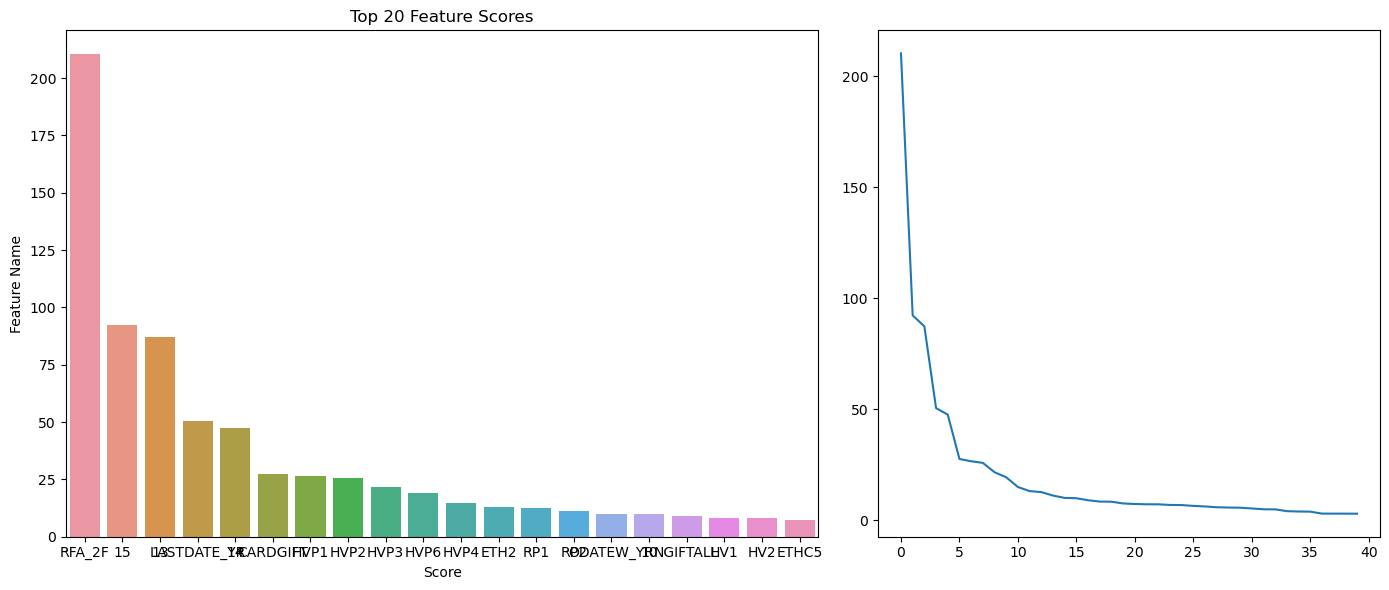

In [16]:
ml = [elem for elem in zip(kbest.scores_, X.columns.tolist())]
ml.sort(reverse=True)
df = pd.DataFrame(data=ml, columns=['score', 'col_name'])
top_features = df.head(20)

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 2]})

# Create a bar plot on the left subplot
sns.barplot(y='score', x='col_name', data=top_features, ax=axes[0])
axes[0].set_title('Top 20 Feature Scores')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Feature Name')

plt.plot(df["score"][:40])

plt.tight_layout()

plt.show()

We'll use only the first 6 columns that scored higher with SelectKbest.

In [17]:
X = X[['RFA_2F', 15, 13, 'LASTDATE_YR', 14, 'CARDGIFT']]
X.head()

,RFA_2F,15,13,LASTDATE_YR,14,CARDGIFT
0,4,0.0,0.0,95,1.0,14
1,2,0.0,0.0,95,0.0,1
2,4,0.0,0.0,95,1.0,14
3,4,0.0,0.0,95,1.0,7
4,2,1.0,0.0,96,0.0,8


## X - y split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (76329, 355)
Shape of y_train: (76329,)
Shape of X_test: (19083, 355)
Shape of y_test: (19083,)


## Class imba

In [25]:
y.value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

### Upscaling

In [26]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 

majority_indexes = y_train[y_train == 0].index
minority_indexes = y_train[y_train == 1].index
selected_rows = np.random.choice(minority_indexes, size = len(majority_indexes), replace=True)

X_train_up = X_train.loc[list(selected_rows),:]
y_train_up = y_train[list(selected_rows)]

In [34]:
# Separate majority/minority classes
randi = RandomOverSampler(random_state=42)

X_train_up, y_train_up = randi.fit_resample(X_train, y_train)
display(pd.concat([X_train_up,y_train_up],axis=1).head())
Counter(y_train_up)

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_D,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,TARGET_B
0,1,75.0,4,6,2,0,31,10,68,6,12,3,9,706,203,272,99,0,0,47,53,75,21,0,2,2,0,0,0,0,0,1,0,0,1,0,2,34,42,46,36,45,49,25,36,47,17,13,21,19,13,15,12,6,14,14,35,21,16,28,9,25,21,38,42,23,10,4,61,10,7,22,177,260,77,75,2,22,20,10,0,0,0,631,644,3,3,71,29,93,7,0,34,75,59,24,88,12,10,2,8,9,21,4,14,43,19,7,14,1,0,1,4,23,75,0,0,52,54,57,14,4,16,6,0,11,9,9,0,3,8,80,92,3160.0,213.0,567.0,338,331,357,343,11908,10,31,13,21,21,5,0,0,0,8,33,16,21,16,6,0,0,0,41,7,57,7,34,66,11,75,20,0,0,0,0,0,0,5,0,5,14,19,5,45,67,66,68,63,68,90,59,99,99,0,27,20,2,10,17,0,0,7,0,4,8,2,3,0,0,2,14,6,5,2,22,3,0,0,0,3,28,7,9,6,12,3,4,59,16,0,140,5,10,29,12,6,25,14,7,22,1,19,8,0,0,0,15,31,2,10,30,68,0,0,6,0,1,0,0,6,1,0,0,0,0,0,0,0,1,67,98,2,0,0,96,66,13,10,32,0,5,5,14,46,54,0,0,21,3,26,47,0,3,99,0,99,99,90,6,2,9,8,23,48,5,11,96.0,16,8,1.0,10.0,7.0,4,6.000000,24398,1,3,32,24,3,1,86,1,23,1,89,2,90,12,96,1,88,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,53.0,5,9,0,0,29,24,38,7,8,4,9,4526,1232,1592,0,0,99,49,51,75,16,9,0,1,0,0,0,0,0,0,0,1,0,0,0,35,47,51,38,49,53,28,39,40,20,11,18,16,15,14,12,14,14,18,34,19,15,35,14,32,21,33,46,30,14,5,62,8,11,18,189,277,78,77,0,3,3,1,2,2,0,257,316,2,1,79,21,89,11,7,39,77,63,30,88,12,9,2,7,10,18,2,16,40,18,4,8,4,0,1,2,4,16,0,1,37,49,52,14,5,3,0,19,14,2,1,4,0,1,5,30,0.0,269.0,671.0,176,214,223,249,7818,45,20,14,14,5,1,0,0,0,36,22,17,17,6,1,0,0,0,41,14,25,23,35,65,4,76,21,0,0,0,0,0,1,2,0,44,31,34,13,59,48,58,40,55,36,55,44,57,90,10,7,6,3,12,14,0,2,10,5,13,13,7,7,4,3,8,24,5,2,3,15,5,3,2,1,8,8,3,6,7,8,4,8,69,4,0,120,20,21,39,11,3,3,3,1,24,1,20,4,0,0,0,14,29,1,24,17,38,10,0,3,0,4,0,0,3,0,0,0,0,0,0,0,0,0,80,98,1,0,1,88,60,23,9,23,1,5,20,45,59,41,0,1,66,12,10,1,0,11,96,1,56,97,86,8,2,7,7,6,14,5,12,20.0,1,1,20.0,20.0,20.0,9,20.000000,115008,0,1,60,53,2,3,96,1,45,1,96,2,96,2,96,2,96,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
2,1,60.0,5,1,5,0,42,16,62,10,2,1,1,6643,2027,3091,99,0,0,45,55,98,0,0,1,2,

Counter({0: 72486, 1: 72486})

### SMOTE version

In [35]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42, k_neighbors=3)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)
display(X_train.shape, X_train_SMOTE.shape)

(76329, 355)

(144972, 355)

In [36]:
y_train_SMOTE.value_counts()

0    72486
1    72486
Name: TARGET_B, dtype: int64

### Random Forest with upscaled data and random parameters.

In [38]:
clf_up = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)

clf_up.fit(X_train_up, y_train_up)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf_up.score(X_train_up, y_train_up)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf_up.score(X_test, y_test)))

y_pred = clf_up.predict(X_test)
print()
print()
print('Y test value counts:')
display(y_test.value_counts())

The R2 for the Random Forest in the TRAIN set is 1.00
The R2 for the Random Forest in the TEST  set is 1.00


Y test value counts:


0    18083
1     1000
Name: TARGET_B, dtype: int64

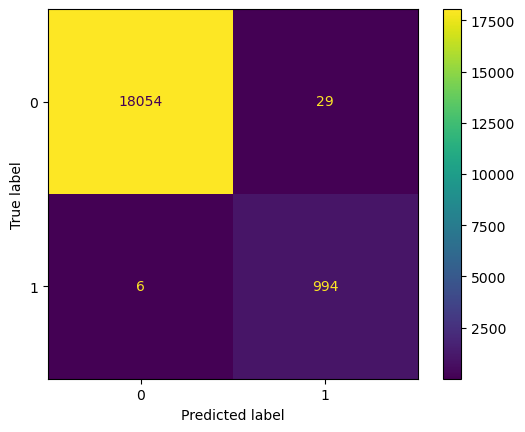

In [39]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_up.classes_)
disp.plot()
plt.show()

In [45]:
classification_report(y_test, y_pred)
display("Accuracy TEST: {:.2f}".format(accuracy_score(y_test,y_pred)),"Kappa TEST: {:.2f}".format(cohen_kappa_score(y_test,y_pred)))

'Accuracy TEST: 1.00'

'Kappa TEST: 0.98'

## Improve the model

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Recall in order to reduce the number of false negatives 
scorer = make_scorer(recall_score)

# Grid parameters to test
n_estimators = [50,150]
max_depth_choices= [4,5]
criterion_choices =  ['gini'] 
min_samples_split_choices = [7,8,9,10] 
min_samples_leaf_choices = [4,5] 
max_features_choices = [4,5,6]

grid = {'n_estimators': n_estimators,
        'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices, 
        'min_samples_leaf': min_samples_leaf_choices,
        'max_features': max_features_choices}

In [32]:
rf_clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf_clf, 
                           scoring = scorer, 
                           param_grid = grid, 
                           cv = 5, 
                           verbose = 2)

### Upscaled data

In [71]:
rs_up_grid = grid_search.fit(X_train_up, y_train_up)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   1.1s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=150; total time=   3.1s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=7, n_estimators=150; total time=   3.2s
[CV] END criterion=

[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   1.3s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_samples_split=9, n_estimators=150; total time=   3.8s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_samples_split=9, n_estimators=150; total time=   3.5s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_samples_split=9, n_estimators=150; total time=   3.6s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_samples_split=9, n_estimators=150; total time=   3.5s
[CV] END criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, min_s

[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_samples_split=7, n_estimators=150; total time=   5.1s
[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_samples_split=7, n_estimators=150; total time=   5.3s
[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_samples_split=7, n_estimators=150; total time=   4.2s
[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_samples_split=7, n_estimators=150; total time=   5.7s
[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_samples_split=7, n_estimators=150; total time=   4.2s
[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   1.3s
[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=4, max_features=5, min_samples_leaf=5, min_

[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=9, n_estimators=150; total time=   4.2s
[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=9, n_estimators=150; total time=   4.2s
[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.3s
[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.5s
[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.4s
[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.3s
[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.3s
[CV] END criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, mi

[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   1.3s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   1.4s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   1.6s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=150; total time=   5.0s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=150; total time=   4.5s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=150; total time=   4.9s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=4, min_sa

[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   1.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   4.2s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   4.1s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   4.1s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   4.0s
[CV] END criterion=gini, max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=150; total time=   4.2s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=7, n_estimators=50; total time=   1.4s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4

[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   5.4s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   6.3s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   7.6s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   2.7s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   1.7s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   1.6s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   1.6s
[CV] END criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, min_sa

[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_samples_split=7, n_estimators=50; total time=   1.6s
[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_samples_split=7, n_estimators=50; total time=   1.6s
[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_samples_split=7, n_estimators=50; total time=   1.6s
[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_samples_split=7, n_estimators=50; total time=   1.7s
[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_samples_split=7, n_estimators=50; total time=   1.6s
[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_samples_split=7, n_estimators=150; total time=   4.9s
[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_samples_split=7, n_estimators=150; total time=   4.9s
[CV] END criterion=gini, max_depth=5, max_features=6, min_samples_leaf=5, min_sam

In [76]:
display('Best parameters:', rs_up_grid.best_params_, 'Recall score:', rs_up_grid.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 6, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 150}
Recall score: 0.6908094113553712
